In [ ]:
#my objectives.
#1. I want to eliminate duplicate records to ensure each data point is unique 
#2.To avoid misleading calculations or model predictions by replacing error with NaN
#3. convert columns with incosistent datatypes into appropriate formats
#4.to handle missing values


In [2]:
#i first import all the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
# then i can load the data set
df = pd.read_csv('climate_action_data.csv')

In [ ]:
#i check out the structure of the dataset

print("dataset shape:", df.shape) #this displays the number of rows and columns in the dataset
#we display the datatypes of the different columns in the dataset
print("\nColumn data types:\n",df.dtypes)
#i the check out for the empty(missing) values
print("\nMissing values:\n", df.isnull().sum())
#here i display sample data
print("\nSample data:\n",df.head()) 

dataset shape: (913, 10)

Column data types:
 Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

Missing values:
 Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

Sample data:
   Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3  

In [7]:
#here we replace where we have error with NaN
df.replace('error',np.nan,inplace=True)

In [8]:
#handling the issue of wrong formats
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        continue

In [9]:
#here i am going to be removing duplicate values
df.drop_duplicates(inplace= True)

In [10]:
#i can confirm to make sure  there are no more duplicate values
duplicate_count = df.duplicated().sum()
print(f"number of duplicate rows: {duplicate_count}")

number of duplicate rows: 0


In [11]:
row_thresh = len(df.columns) // 2
df.dropna(thresh=row_thresh, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

In [12]:
print("\nRemaining missing values after cleaning:\n", df.isnull().sum())


Remaining missing values after cleaning:
 Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [13]:
print("\nDescriptive statistics:\n", df.describe())


Descriptive statistics:
        Soil_Moisture(%)     Soil_pH  Temperature(C)  Humidity(%)  \
count        797.000000  797.000000      797.000000   797.000000   
mean          44.763726    6.248795       26.460602    60.037265   
std           20.524828    1.024776        4.878540    17.470601   
min           10.350000    4.520000       18.000000    30.000000   
25%           26.930000    5.320000       22.300000    45.900000   
50%           45.410000    6.260000       26.600000    59.600000   
75%           62.670000    7.080000       30.600000    75.300000   
max           79.980000    8.000000       35.000000    89.900000   

       Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
count                     797.000000                  797.000000  
mean                       87.468005                   17.392221  
std                        34.874392                    7.162517  
min                        30.000000                    5.000000  
25%                       

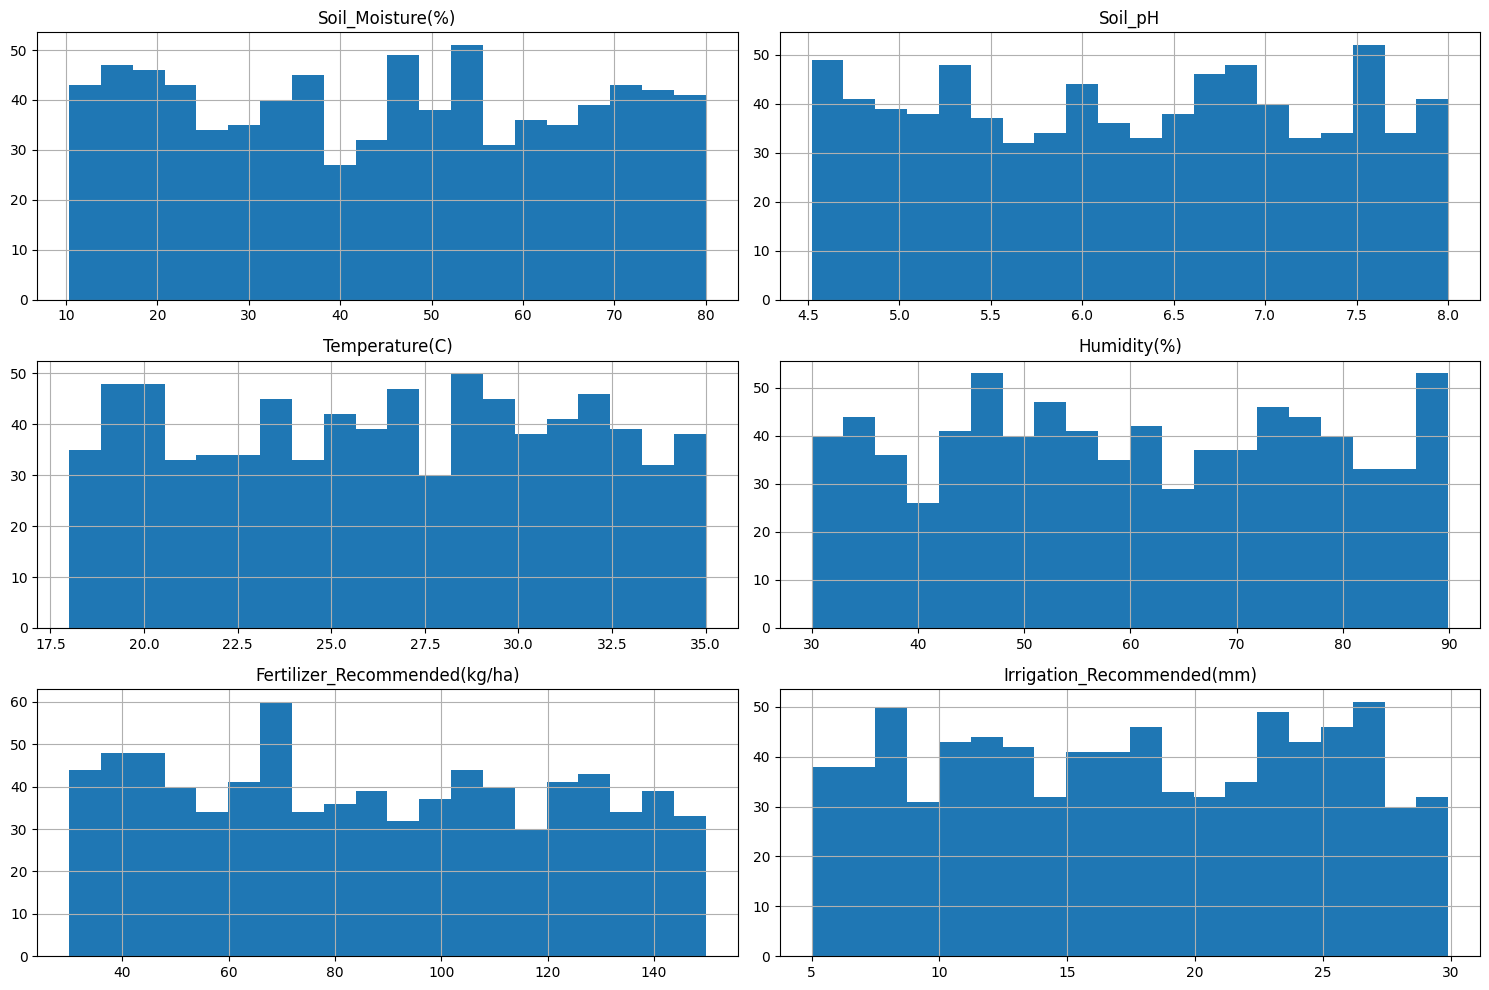

In [14]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

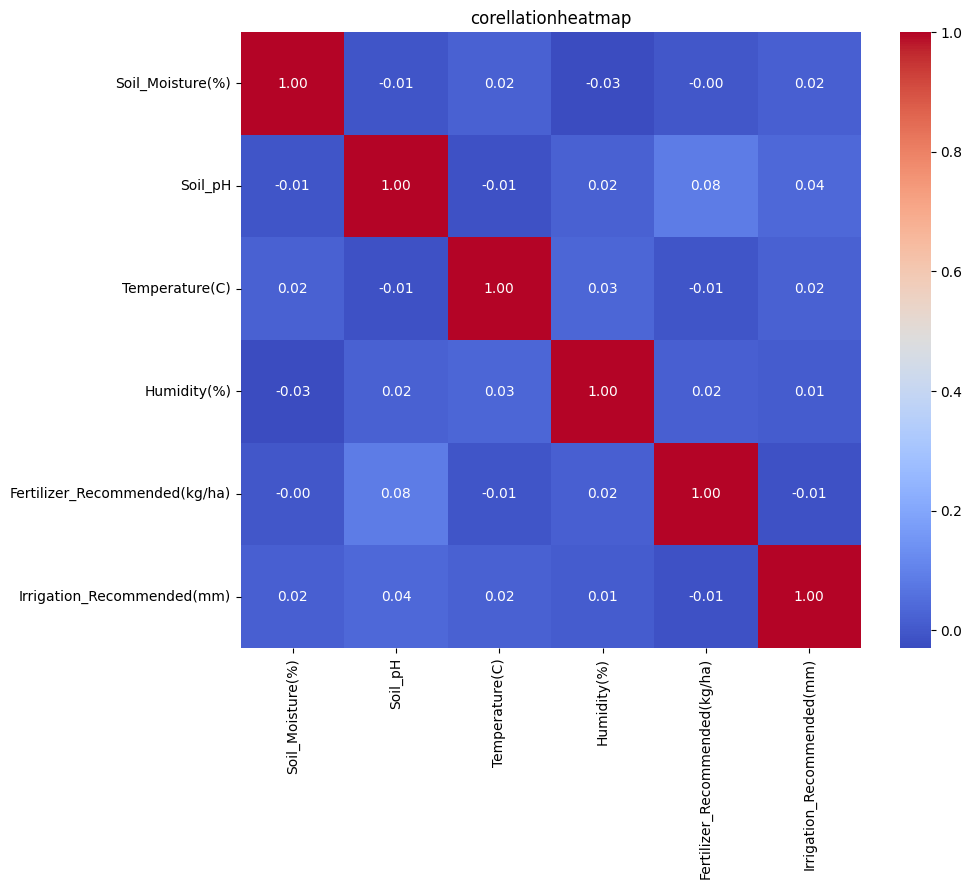

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("corellationheatmap")
plt.show()

In [16]:
if'fertilizer_recommendation' in df.columns:
    corr_fert = df.corr()['fertilizer_recommendation'].sort_values(ascending=False)
    print("\nVariables most influencing fertilizer recommendations:\n", corr_fert)

In [17]:
if 'soil_moisture' in df.columns and 'crop_type' in df.columns:
    moisture_avg =df.groupby('crop_type')['soil_moisture'].mean().sort_values(ascending=False)
    top_crop = moisture_avg.idxmax()
    print(f"\nCrop type with highest average soil moisture:{top_crop} ({moisture_avg[top_crop]:.2f}%)")

In [18]:
if 'temperature' in df.columns and 'crop_type' in df.columns:
    high_temp_crops = df[df['temperature'] > 30].groupby('crop_type')['temperature'].mean()
    print("\nCrops with average temperature > 30\u00b0C and suggested irrigation adjustment:")
    for crop, temp in high_temp_crops.items():
        print(f"- {crop}: Avg Temp = {temp:.2f}\u00b0C = Increase irrigation frequency or apply mulching")

In [19]:
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)
print("\nCleaned dataset exported as 'cleaned_precision_agriculture-data.csv'")


Cleaned dataset exported as 'cleaned_precision_agriculture-data.csv'
